 Dans cette partie nous avons remplcaer la localité de provenance dechaque patient par le taux de 
laitalité du paludisme dela region de d'origine. 
Pour les localités dont nous ignorons les regions d'appartenance ainsi que les ptients dont la localité 
d'origine n'est pas spécifiée nous les avons remplace par le taux de laitalité nationale du paludisme du senegal

Le taux de létalité est la proportion de cas fatals liés à une maladie ou à une affection particulière,
par rapport au nombre total de cas atteints par la maladie ou concernés par la condition particulière 
(par exemple : exposition à un risque naturel ou industriel).

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\ndogue85\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
palu=pd.read_excel('C:/Users/ndogue85/Documents/these/code_oython_these/palu_adresse.xlsx')

In [3]:
palu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21083 entries, 0 to 21082
Data columns (total 30 columns):
Num_Patients      21083 non-null int64
Num_JourVisite    21083 non-null int64
A_annees          21083 non-null int64
A_mois            21083 non-null int64
A_semaines        21083 non-null int64
A_jours           21083 non-null int64
Sexe              20888 non-null object
TENSION_A 1       21083 non-null int64
TENSION_A 2       21083 non-null int64
PPOIDS            21083 non-null int64
TEMPERATURE       21083 non-null int64
S_M8_APPETIT      21083 non-null int64
S_FATIGUE         21083 non-null int64
S_ARTHRALGI       21083 non-null int64
S_T_DIGESTIF      21083 non-null int64
S_VERTIGE         21083 non-null int64
S_FRISSON         21083 non-null int64
S_MYALGIE         21083 non-null int64
S_DIARRHEE        21083 non-null int64
S_DABDO           21083 non-null int64
S_VOMISS          21083 non-null int64
S_NAUSEE          21083 non-null int64
S_CEPHALE         21083 non-null

In [4]:
palu.head()

,Num_Patients,Num_JourVisite,A_annees,A_mois,A_semaines,A_jours,Sexe,TENSION_A 1,TENSION_A 2,PPOIDS,...,S_VOMISS,S_NAUSEE,S_CEPHALE,S_FIEVRE,TDR,Diagnostic,Hosp,Ref,Deces,Adresse
0,1,0,20,0,0,0,2,11,7,74,...,1,0,0,0,9,0,9,9,9,4.0
1,2,1,7,0,0,0,1,12,7,113,...,0,0,1,0,2,0,9,9,9,0.9
2,3,2,44,0,0,0,2,8,7,98,...,0,0,1,1,9,0,9,9,9,4.6
3,4,3,2,6,0,0,1,11,8,85,...,0,0,0,0,2,0,2,2,2,2.6
4,5,4,31,0,0,0,1,10,7,71,...,0,0,0,0,9,0,9,9,9,4.6


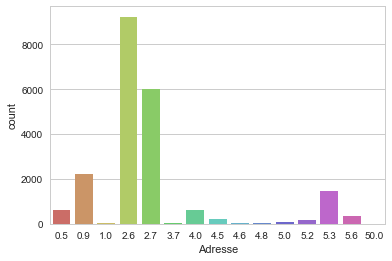

In [5]:
sns.countplot(x=palu['Adresse'],data=palu, palette='hls')
plt.show()

On constate les habitants de la region de diourbel sont trop majoritaire par rapport aux autres regions 

In [6]:
paluu=pd.DataFrame(palu, columns = ['PPOIDS', 'TEMPERATURE', 'S_M8_APPETIT', 'S_FATIGUE', 'S_ARTHRALGI', 'S_T_DIGESTIF', 'S_VERTIGE', 'S_FRISSON', 'S_MYALGIE', 'S_DABDO', 'S_VOMISS', 'S_NAUSEE', 'S_CEPHALE', 'S_FIEVRE','TDR','Adresse'])

In [7]:
paluu.head()

,PPOIDS,TEMPERATURE,S_M8_APPETIT,S_FATIGUE,S_ARTHRALGI,S_T_DIGESTIF,S_VERTIGE,S_FRISSON,S_MYALGIE,S_DABDO,S_VOMISS,S_NAUSEE,S_CEPHALE,S_FIEVRE,TDR,Adresse
0,74,37,0,0,0,0,0,0,0,0,1,0,0,0,9,4.0
1,113,37,0,0,0,0,0,1,0,0,0,0,1,0,2,0.9
2,98,37,0,0,0,0,0,0,0,0,0,0,1,1,9,4.6
3,85,37,0,0,0,0,0,0,0,0,0,0,0,0,2,2.6
4,71,37,0,0,0,0,0,0,0,0,0,0,0,0,9,4.6


# Suréchantillonnage avec l'algorithme SMOTE
Il consiste à céer u echantillon de données synthetiques apartir de la valeur dependante Diagnostic au lieu de faire des copies des valeurs existantes. Ensuite choisir au hasard l'un des k plus proches voisins et l'utiliser pour créer de nouvelles observations similaires, mais au hasard



In [8]:
X1 = paluu
y1 =palu['Diagnostic']
from imblearn.over_sampling import SMOTE
Re= SMOTE(random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
columns = X1_train.columns
Re_data_X1,Re_data_y1=Re.fit_sample(X1_train, y1_train)
Re_data_X1 = pd.DataFrame(data=Re_data_X1,columns=columns )
#os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])


In [9]:
# Nous séparons notre jeu données palu en deux parties. Une partie pour entrainer X_train et un partie pour tester X_test
# Nous séparons notre variable cible en deux parties. Une partie pour entrainer y_train et une partie pour tester y_test
X = Re_data_X1
y = Re_data_y1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
palu_classifier = LogisticRegression(random_state=0)
palu_classifier.fit(X_train, y_train)
palu_pred = palu_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, palu_pred)
from sklearn.metrics import classification_report

print(confusion_matrix)


[[3230  348]
 [ 480 3109]]


In [10]:
print(classification_report(y_test, palu_pred))
print('La precision de la regression logistique sur les données de test  : {:.2f}'.format(palu_classifier.score(X_test, y_test)*100))

             precision    recall  f1-score   support

          0       0.87      0.90      0.89      3578
          1       0.90      0.87      0.88      3589

avg / total       0.88      0.88      0.88      7167

La precision de la regression logistique sur les données de test  : 88.45


On remarque que le score est un peut meilleur comparaer à l'éxpérimentation sans le taux de laitalite.
En effet il passe de 88.45% contre 88.35%

# SVM avec kernel=polynom

In [11]:
dt1 = Re_data_X1
y1 = Re_data_y1
from sklearn.model_selection import train_test_split
dt1_train,dt1_test,y_train,y_test=train_test_split(dt1,y1, test_size=0.20)
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(dt1_train, y_train)  
y_pred = svclassifier.predict(dt1_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[2642  264]
 [ 359 2469]]
             precision    recall  f1-score   support

          0       0.88      0.91      0.89      2906
          1       0.90      0.87      0.89      2828

avg / total       0.89      0.89      0.89      5734



On constate que le score c'est ausssi amélioré par raaport à la fonction de refression logistoique.
En effet on note une lègère hausse. Elle passe de  89% contre 88.45%
    Ce pendant dans les deux expérimentations on note qu'il y'apas une variation assez significatif entre la regresssion logistique et le SVM
Ps: jepropose de faire une cross validation pour selectionner les meilleurs paramètres pour la regression logistique